In [47]:
#
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [48]:
#read in FEC data
full_dataset = pickle.load(open('Datasets/training_set.p', 'rb'))
full_dataset.head()

,district,state,year,party,candidatevotes,totalvotes,candidate,national_poll,national_poll_prior,national_poll_delta_sub,...,prior_win_dem_percent,prior_win_rep_percent,prior_margin_unsigned_divide,prior_margin_unsigned_minus,prior_margin_signed_divide,prior_margin_signed_minus,prior_win_dem,prior_win_rep,curr_win_dem,curr_win_rep
AK_01_2012,1,AK,2012,republican,185296.0,289804.0,Don Young,1.988304,-2.622642,4.610946,...,0.310421,0.689579,2.221428,0.379157,0.450161,-0.379157,0.0,1.0,0.0,1.0
AL_01_2012,1,AL,2012,republican,196374.0,200676.0,Jo Bonner,1.988304,-2.622642,4.610946,...,0.174161,0.825839,4.741825,0.651679,0.210889,-0.651679,0.0,1.0,0.0,1.0
AL_02_2012,2,AL,2012,republican,180591.0,283953.0,Martha Roby,1.988304,-2.622642,4.610946,...,0.490271,0.509729,1.039690,0.019459,0.961825,-0.019459,0.0,1.0,0.0,1.0
AL_03_2012,3,AL,2012,republican,175306.0,273930.0,Mike Rogers,1.988304,-2.622642,4.610946,...,0.405791,0.594209,1.464323,0.188418,0.682909,-0.188418,0.0,1.0,0.0,1.0
AL_04_2012,4,AL,2012,republican,199071.0,269118.0,Robert B. Aderholt,1.988304,-2.622642,4.610946,...,0.011825,0.988175,83.564524,0.976349,0.011967,-0.976349,0.0,1.0,0.0,1.0


In [49]:
#1 =democratic party
# additional features to try: 
#"prior_margin_unsigned_minus","national_poll","national_poll_prior"]

#select cols from main dataset
cols_to_use =["curr_win_dem","prior_win_dem","state"]
small_dataset =full_dataset[cols_to_use]

#add column to indicate a party flip
small_dataset['party_flip']= (small_dataset.prior_win_dem!=small_dataset.curr_win_dem)*1

#add one hot encoder for states (with or without dropping first)
small_dataset = pd.get_dummies(small_dataset,'state',drop_first=True)

print(small_dataset.shape)
small_dataset.head()

(1269, 52)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,curr_win_dem,prior_win_dem,party_flip,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DE,...,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY
AK_01_2012,0.0,0.0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL_01_2012,0.0,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL_02_2012,0.0,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL_03_2012,0.0,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL_04_2012,0.0,0.0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


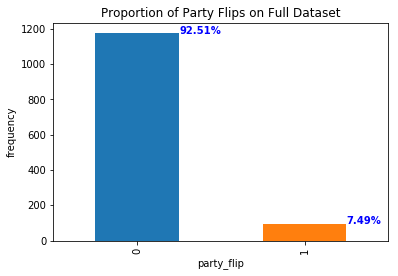

In [50]:
plt.title('Proportion of districts that chage party in consecutive elections')
plt.ylabel('frequency')
plt.xlabel('Party Change')
small_dataset.party_flip.value_counts().plot(kind='bar')

#proportion of districts on the full data that do not flip
small_dataset.groupby('party_flip')['party_flip'].count().plot.bar()
plt.title('Proportion of Party Flips on Full Dataset')

for name, group in (small_dataset.groupby('party_flip')['party_flip']):
    plt.text(int(name)+.25, group.count() + .25, \
    '{0:.2f}'.format(group.count()/small_dataset.shape[0]*100)+'%', color='blue', fontweight='bold')
 

In [51]:
#split data into train and test
train_data, test_data = train_test_split(small_dataset, test_size=.2, \
                        stratify=small_dataset.party_flip,random_state=209)

#response variable
y_train=train_data["curr_win_dem"]
y_test = test_data["curr_win_dem"]

#predictors
X_train=train_data[small_dataset.columns.difference(["curr_win_dem"])]
X_test=test_data[small_dataset.columns.difference(["curr_win_dem"])]

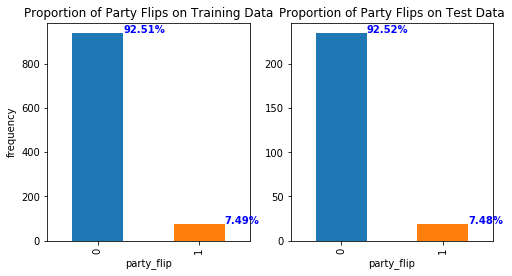

In [52]:
#View the distribution of flips in train and test set

fig, ax = plt.subplots(1,2, figsize=(8,4))
X_train.groupby('party_flip')['party_flip'].count().plot.bar(ax=ax[0])
X_test.groupby('party_flip')['party_flip'].count().plot.bar(ax=ax[1])

#add title and axis
ax[0].set_title("Proportion of Party Flips on Training Data")
ax[0].set_ylabel("frequency")
ax[1].set_title("Proportion of Party Flips on Test Data")


#add bar numbers on training data plot
for name, group in (X_train.groupby('party_flip')['party_flip']):
    ax[0].text(int(name)+.25, group.count() + .25, \
    '{0:.2f}'.format(group.count()/X_train.shape[0]*100)+'%', color='blue', fontweight='bold')
    
#add bar numbers on test data plot
for name, group in (X_test.groupby('party_flip')['party_flip']):
    ax[1].text(int(name)+.25, group.count() + .25, \
    '{0:.2f}'.format(group.count()/X_test.shape[0]*100)+'%', color='blue', fontweight='bold')

In [53]:
#model  LOGISTIC
lr_model = LogisticRegressionCV(cv=5,random_state=209,multi_class='ovr',n_jobs=4)
lr_model.fit(X_train,y_train)
print("Model R2 score: ",lr_model.score(X_train,y_train))

#predict on test set
y_pred_test = lr_model.predict(X_test,)
print("Test Accuracy: ",accuracy_score(y_test,y_pred_test))

#confusion metrics
confusion_matrix(y_test,y_pred_test)

Model R2 score:  0.9251231527093596
Test Accuracy:  0.9251968503937008


array([[131,  11],
       [  8, 104]])

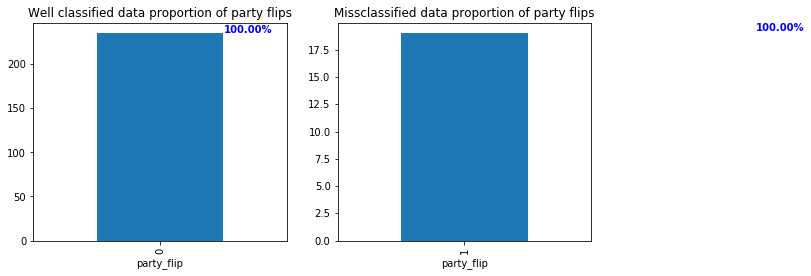

In [8]:
#looking at the missclassifications 

miss_class_df = X_test[y_test != y_pred_test]
good_class_df = X_test[y_test == y_pred_test]

#plot the flips and non flips for each dat
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].set_title('Well classified data proportion of party flips')
ax[1].set_title('Missclassified data proportion of party flips')

good_class_df.groupby('party_flip')['party_flip'].count().plot.bar(ax=ax[0])
miss_class_df.groupby('party_flip')['party_flip'].count().plot.bar(ax=ax[1])

for name, group in (good_class_df.groupby('party_flip')['party_flip']):
    ax[0].text(int(name)+.25, group.count() + .25, \
    '{0:.2f}'.format(group.count()/good_class_df.shape[0]*100)+'%', color='blue', fontweight='bold')

for name, group in (miss_class_df.groupby('party_flip')['party_flip']):
    ax[1].text(int(name)+.15, group.count() + .25, \
    '{0:.2f}'.format(group.count()/miss_class_df.shape[0]*100)+'%', color='blue', fontweight='bold')
  


In [9]:
#Over-sampling minority class and under-sampling majority class
#https://www.cs.cmu.edu/afs/cs/project/jair/pub/volume16/chawla02a-html/chawla2002.html

N=1000
bootstrapped_df_flip = small_dataset[small_dataset['party_flip']==1].\
                        sample(N, replace=True,random_state=209)
bootstrapped_df_no_flip = small_dataset[small_dataset['party_flip']!=1].\
                        sample(N,replace=True,random_state=209)
bootstrapped_df = pd.concat([bootstrapped_df_flip,bootstrapped_df_no_flip])
bootstrapped_df =pd.DataFrame(bootstrapped_df)
bootstrapped_df.shape


#split data into train and test
train_data, test_data = train_test_split(bootstrapped_df, test_size=.2, \
                        stratify=bootstrapped_df.party_flip,random_state=209)
y_train=train_data["curr_win_dem"]
y_test = test_data["curr_win_dem"]
X_train=train_data[bootstrapped_df.columns.difference(["curr_win_dem"])]
X_test=test_data[bootstrapped_df.columns.difference(["curr_win_dem"])]


#train
#model  LOGISTIC
lr_model = LogisticRegressionCV(cv=5,random_state=42,multi_class='ovr',n_jobs=4)
lr_model.fit(X_train,y_train)
print("Bootstrapped Model R2 score: ",lr_model.score(X_train,y_train))

#predict on test set
y_pred_test = lr_model.predict(X_test)
print("Bootstrapped Model Test Accuracy: ",accuracy_score(y_test,y_pred_test))

#confusion metrics
confusion_matrix(y_test,y_pred_test)


Bootstrapped Model R2 score:  0.734375
Bootstrapped Model Test Accuracy:  0.73


array([[170,  68],
       [ 40, 122]])

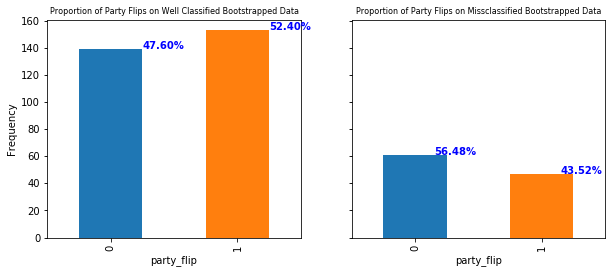

In [10]:
#looking at the missclassifications on bootstrapped data

miss_class_df = X_test[y_test != y_pred_test]
good_class_df = X_test[y_test == y_pred_test]

#plot the flips and non flips for each dat
fig, ax = plt.subplots(1,2, figsize=(10,4),sharey=True)
ax[0].set_title('Proportion of Party Flips on Well Classified Bootstrapped Data', fontsize=8)
ax[1].set_title('Proportion of Party Flips on Missclassified Bootstrapped Data', fontsize=8)
ax[0].set_ylabel("Frequency")

good_class_df.groupby('party_flip')['party_flip'].count().plot.bar(ax=ax[0])
miss_class_df.groupby('party_flip')['party_flip'].count().plot.bar(ax=ax[1])

for name, group in (good_class_df.groupby('party_flip')['party_flip']):
    ax[0].text(int(name)+.25, group.count() + .25, \
    '{0:.2f}'.format(group.count()/good_class_df.shape[0]*100)+'%', color='blue', fontweight='bold')

for name, group in (miss_class_df.groupby('party_flip')['party_flip']):
    ax[1].text(int(name)+.15, group.count() + .25, \
    '{0:.2f}'.format(group.count()/miss_class_df.shape[0]*100)+'%', color='blue', fontweight='bold')


(108, 51) (292, 51)


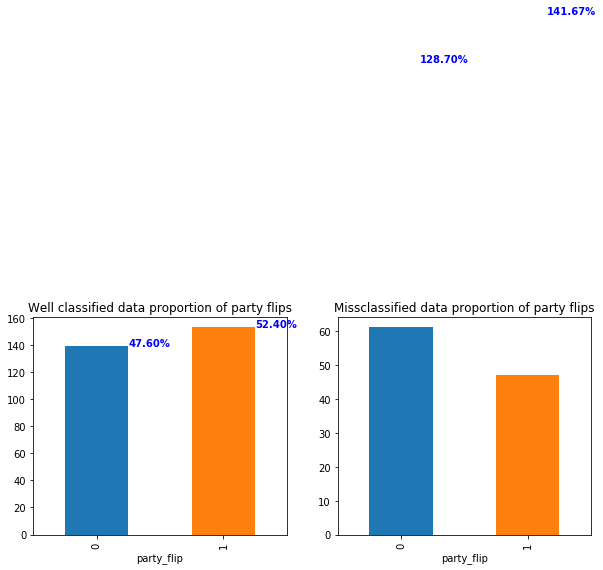

In [11]:
#looking at the missclassifications 

miss_class_df = X_test[y_test != y_pred_test]
good_class_df = X_test[y_test == y_pred_test]

print(miss_class_df.shape, good_class_df.shape)

#plot the flips and non flips for each dat
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].set_title('Well classified data proportion of party flips')
ax[1].set_title('Missclassified data proportion of party flips')

good_class_df.groupby('party_flip')['party_flip'].count().plot.bar(ax=ax[0])
miss_class_df.groupby('party_flip')['party_flip'].count().plot.bar(ax=ax[1])

for name, group in (good_class_df.groupby('party_flip')['party_flip']):
    ax[0].text(int(name)+.25, group.count() + .25, \
    '{0:.2f}'.format(group.count()/good_class_df.shape[0]*100)+'%', color='blue', fontweight='bold')

#for name, group in (miss_class_df.groupby('party_flip')['party_flip']):
    ax[1].text(int(name)+.15, group.count() + .25, \
    '{0:.2f}'.format(group.count()/miss_class_df.shape[0]*100)+'%', color='blue', fontweight='bold')
  



In [59]:
#Try KNN
k_values =[1,3,5,10,25,100,500]
k_score = []
k_test_accuracy =[]

for i in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=i,n_jobs=4)
    knn_model.fit(X_train,y_train)
    k_score.append(knn_model.score(X_train,y_train))
    y_pred_test = knn_model.predict(X_test)
    k_test_accuracy.append(accuracy_score(y_test,y_pred_test))

Text(0, 0.5, 'Test Accuracy')

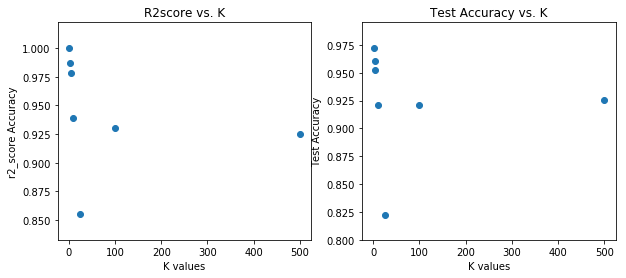

In [61]:
fig, ax = plt.subplots(1,2, figsize=(10,4))
ax[0].scatter(k_values,k_score)
ax[1].scatter(k_values,k_test_accuracy)
#ax[0].set_xticklabels(k_values)

ax[0].set_title("R2score vs. K")
ax[1].set_title("Test Accuracy vs. K")

ax[0].set_xlabel("K values")
ax[0].set_ylabel("r2_score Accuracy")
ax[1].set_xlabel("K values")
ax[1].set_ylabel("Test Accuracy")

In [56]:
print("1 KNN R2score :",k_score[0])
print("1 knn Test Accuracy: ",k_test_accuracy[0])

1 KNN R2score : 1.0
1 knn Test Accuracy:  0.9724409448818898


Try out another model , Random Forest, shows we get same results

In [63]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)
print("RF Model Score: ",rf_model.score(X_train,y_train))
y_pred_test = rf_model.predict(X_test,)
print("RF Accuracy : ",accuracy_score(y_test,y_pred_test))

RF Model Score:  1.0
RF Accuracy :  1.0


/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Next:
Concentrate on improving the states that flip to a different party between elections
Add the state information as a predictor
Increase size of data
Potentially take into account redistricting
Potentially add demographics data

#Try another methods maybe the classification is non-linear
#Try lda qda
#non-linear boundaries
#quadratic terms
#knn ?


In [14]:
#try KNN 